In [1]:
import numpy as np
import matplotlib.pyplot as plt

(array([ 0.,  0.,  0.,  1.,  1.,  4., 27., 32., 50., 68., 53., 41., 16.,
         6.,  1.,  0.,  0.,  0.,  0.]),
 array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
        0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
        0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
        0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
 <BarContainer object of 19 artists>)

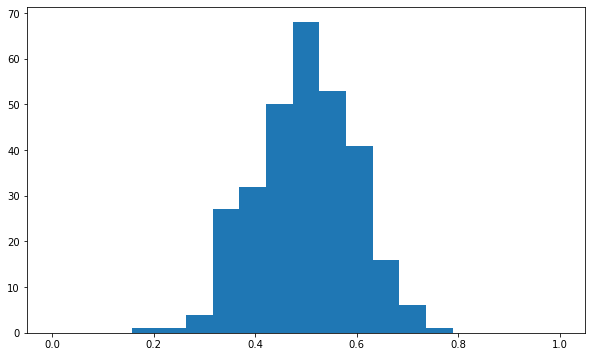

In [83]:
N = 300
true_mu = 0.5
true_sigma = 0.1

np.random.seed(1111)
x = range(1, N+1)
#y = np.sort(np.random.normal(true_mu, true_sigma, N)) + 0.05*(np.random.rand(N) - np.random.rand(N))
y = np.sort(np.random.normal(true_mu, true_sigma, N))
for i in range(len(y)):
    if y[i] < 0:
        y[i] = 0
    elif y[i] > 1:
        y[i] = 1
yerr = 0.05 * np.random.rand(N)

bins = np.linspace(0, 1., 20)
plt.figure(figsize = (10, 6))
plt.hist(y, bins = bins)

In [72]:
def log_likelihood(theta, y):
    mu, sigma = theta
    sigma2 = sigma ** 2
    ll = (-1 / (2 * sigma2) * np.sum((y - mu) ** 2 )) + np.log(1 / np.sqrt(sigma2))
    if not np.isfinite(ll):
        return -np.inf
    return ll

def log_prior(theta, mu_prior = 0.55):
    mu, sigma = theta
    sigma2 = sigma ** 2
    lp = (-1 / (2 * sigma2) * (mu_prior - mu) ** 2) + np.log(1 / np.sqrt(sigma2))
    if not np.isfinite(lp):
        return -np.inf
    return lp

def log_posterior(theta, y):
    lp = log_prior(theta)
    ll = log_likelihood(theta, y)
    if not np.isfinite(lp):
        return -np.inf
    if not np.isfinite(ll):
        return -np.inf
    return lp + ll

In [79]:
import emcee

num_iter = 5000
ndim = 2
nwalkers = 32
initial_pos = np.array((.5, .2)) + 0.01 * np.random.randn(nwalkers, ndim)
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=[y])
sampler.run_mcmc(initial_pos, num_iter, progress=True);

100%|██████████| 5000/5000 [00:04<00:00, 1174.57it/s]


Test


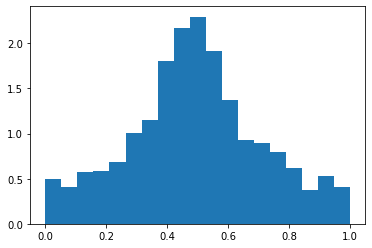

In [81]:
mu_marg = sampler.get_chain(discard=100, thin=15, flat=True).T[0]
sigma_marg = sampler.get_chain(discard=100, thin=15, flat=True).T[1]
bins = np.linspace(0, 1., 20)
plt.hist(mu_marg, bins=bins, density = True)
#plt.hist(sigma_marg ** 2, bins=bins, density = True)
print('Test')

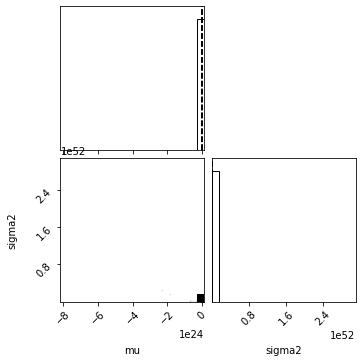

In [75]:
import corner

flat_samples = sampler.get_chain(discard=1000, thin=15, flat=True)
flat_samples.T[1] = flat_samples.T[1] ** 2

labels = ['mu', 'sigma2']
fig = corner.corner(flat_samples, labels=labels, quantiles=[0.16, 0.5, 0.84]);

In [76]:
# Not useful for now
#
#inds = np.random.randint(len(flat_samples), size=100)
#x0 = np.linspace(0, 1, 300)
#f, ax = plt.subplots(figsize=(10,6))
#for ind in inds:
#    sample = flat_samples[ind]
#    ax.plot(x0, 1/(2*np.pi*sample[1])**0.5 * np.exp(-(x-sample[0])**2/(2*sample[1])), alpha=0.05, color='red')
#ax.errorbar(x, y, yerr=yerr, linestyle = 'None',capsize=1, marker ='o', color='black', ms=3)
#ax.set_xlim(0, 1)
#ax.set_ylim(0, 1)
#ax.set_xlabel('Approval', size = 12)
#ax.set_ylabel('Probability of winning', size = 12)